# Lithim Carbonate in Blood Machine Learning Model

## Imports

In [48]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

In [38]:
# Allow the use of custom functions in the utils folder if needed
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('..'))

## Cleaning the Dataset

### Initializing the Dataframe

In [39]:
# Attaches the csv file into a df variable
df = pd.read_csv("../data/20_sample_data.csv")

# Shows the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       20 non-null     int64  
 1   gender       20 non-null     int64  
 2   age          20 non-null     int64  
 3   time_last    20 non-null     int64  
 4   temp         20 non-null     float64
 5   heartrate    20 non-null     int64  
 6   respiratory  20 non-null     int64  
 7   systolic     20 non-null     int64  
 8   diastolic    20 non-null     int64  
 9   BOS          20 non-null     int64  
 10  Li-Conc      20 non-null     float64
dtypes: float64(2), int64(9)
memory usage: 1.8 KB


### Cleaning the Dataset from Uneeded Data

If needed, we can filter the dataframe and even remove some of its columns to target the characteristics that we want. When using machine learning models, keep in mind that the dataframe should contain all the same datatype.

## Basic Machine Learning Model Training & Analysis

### Performing a Train_Test_Split

In [40]:
#Initialize features and targets
features = df[['temp','diastolic', 'BOS']]
target = df['Li-Conc']

# Initialize Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

### Initiazlize Machine Learning Models

In [41]:
# Initilize different bacic machine learning models
model_linear = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()
model_knn = KNeighborsRegressor(n_neighbors = 2)
model_gb = GradientBoostingRegressor() 
model_dt = DecisionTreeRegressor()

# Train the models
model_linear.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

### Make Predictions and Evaluate Performance

The Mean Squared Error(MSE) measures the average squared difference between the rpedicted values and the actual values. It quantifies how close the predictions are to the actual outcome.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The $R^2$ represents the proportion of the variance in the target variable. Mesaures the 'goodness of fit' of the model. 1 Indicates that the model explains 100% of the variance in the target variable. 0 indicates that the models explains none of the variance and the predictions are **as good as the mean of the target variable**. An $R^2$ < 0 indicates that the model performs worse than a simple mean-bsaed prediction.
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


### Making Predictions on Test Set

In [42]:
# Import methods created in the utils folder
from utils.metrics import evaluate_model

# Make predictions
y_pred_linear = model_linear.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

#### Evaluating Machine Learning Models

In [43]:
# Evaluate performance
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)
mse_knn, r2_knn = evaluate_model(y_test, y_pred_knn)
mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R^2 Score: {r2_linear}")

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")

print("\nSupport Vector Regressor Performance:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R^2 Score: {r2_svr}")

print("\nK-Nearest Neighbors Regressor Performance:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R^2 Score: {r2_knn}")

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")

Linear Regression Performance:
Mean Squared Error: 1.3303659240489552
R^2 Score: -0.15455592115506733

Random Forest Regressor Performance:
Mean Squared Error: 1.3655639849999996
R^2 Score: -0.18510250157297503

Support Vector Regressor Performance:
Mean Squared Error: 3.265720368024824
R^2 Score: -1.8341501534137459

K-Nearest Neighbors Regressor Performance:
Mean Squared Error: 2.87440625
R^2 Score: -1.4945488273198673

Gradient Boosting Regressor Performance:
Mean Squared Error: 3.299467070279979
R^2 Score: -1.8634371745286318

Decision Tree Regressor Performance:
Mean Squared Error: 3.0187
R^2 Score: -1.619773925495216


#### Making Predictions

Predictions need to be based on the number of features. This means that if you have 5 features that were used to train the model, you need 5 inputs to make a prediction

In [47]:
# Example of individual user input
user_input1 = 97
user_input8 = 78
user_input9 = 100

# Combine indiividual user input to same format as what was trained
user_input = [[user_input1,user_input8,user_input9]]

# Make predictions with each model
y_pred_linear_new = model_linear.predict(user_input)
y_pred_rf_new = model_rf.predict(user_input)
y_pred_svr_new = model_svr.predict(user_input)
y_pred_knn_new = model_knn.predict(user_input)
y_pred_gb_new = model_gb.predict(user_input)
y_pred_dt_new = model_dt.predict(user_input)

# Output predictions
print("Prediction using Linear Regression:")
print(y_pred_linear_new)

print("\nPrediction using Random Forest Regressor:")
print(y_pred_rf_new)

print("\nPrediction using Support Vector Regressor:")
print(y_pred_svr_new)

print("\nPrediction using K-Nearest Neighbors Regressor:")
print(y_pred_knn_new)

print("\nPrediction using Gradient Boosting Regressor:")
print(y_pred_gb_new)

print("\nPrediction using Decision Tree Regressor:")
print(y_pred_dt_new)


Prediction using Linear Regression:
[39.16748999]

Prediction using Random Forest Regressor:
[1.9199]

Prediction using Support Vector Regressor:
[0.36796724]

Prediction using K-Nearest Neighbors Regressor:
[0.205]

Prediction using Gradient Boosting Regressor:
[2.95043598]

Prediction using Decision Tree Regressor:
[5.31]


c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegres

### Save Models

In [49]:
# Save the each specific machine larning model
# Linear Regression
joblib_file = '../models/Linear_Model.h5'
joblib.dump(model_linear, joblib_file)

# Random Forest Regressor
joblib_file = '../models/RF_Model.h5'
joblib.dump(model_rf, joblib_file)

# Support Vector Regressor
joblib_file = '../models/SVR_Model.h5'
joblib.dump(model_svr, joblib_file)

# K-Nearest Neighbors Regressor
joblib_file = '../models/KNN_Model.h5'
joblib.dump(model_knn, joblib_file)

# Gradient Boosting Regressor
joblib_file = '../models/GB_Model.h5'
joblib.dump(model_gb, joblib_file)

# Decision Tree Regressor
joblib_file = '../models/DT_Model.h5'
joblib.dump(model_dt, joblib_file)

['../models/DT_Model.h5']

## Graphs

### Model Predictions vs. Actual Values

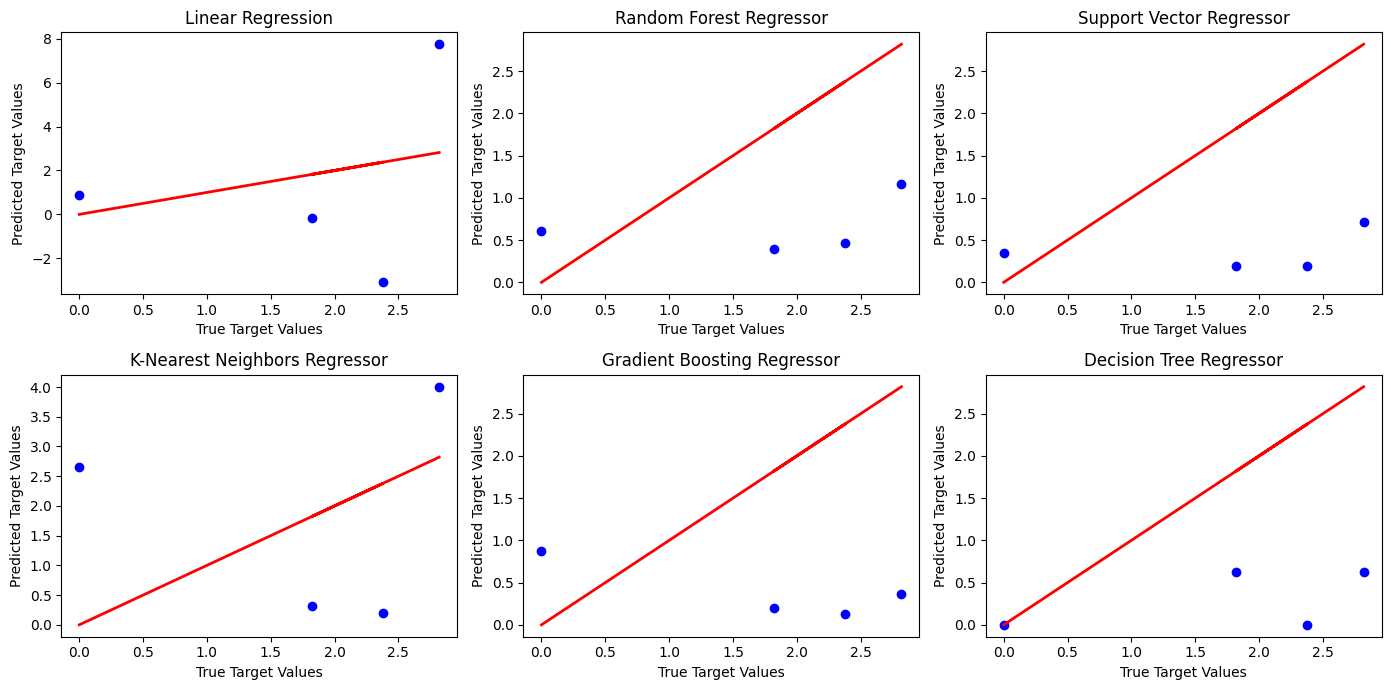

In [ ]:
# Plot predictions vs. actual values
plt.figure(figsize=(14, 7))

# Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Linear Regression')

# Random Forest Regressor
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Random Forest Regressor')

# Support Vector Regressor
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Support Vector Regressor')

# K-Nearest Neighbors Regressor
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('K-Nearest Neighbors Regressor')

# Gradient Boosting Regressor
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_gb, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Gradient Boosting Regressor')

# Decision Tree Regressor
plt.subplot(2, 3, 6)
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Decision Tree Regressor')

plt.tight_layout()
plt.show()


### Learning Curves

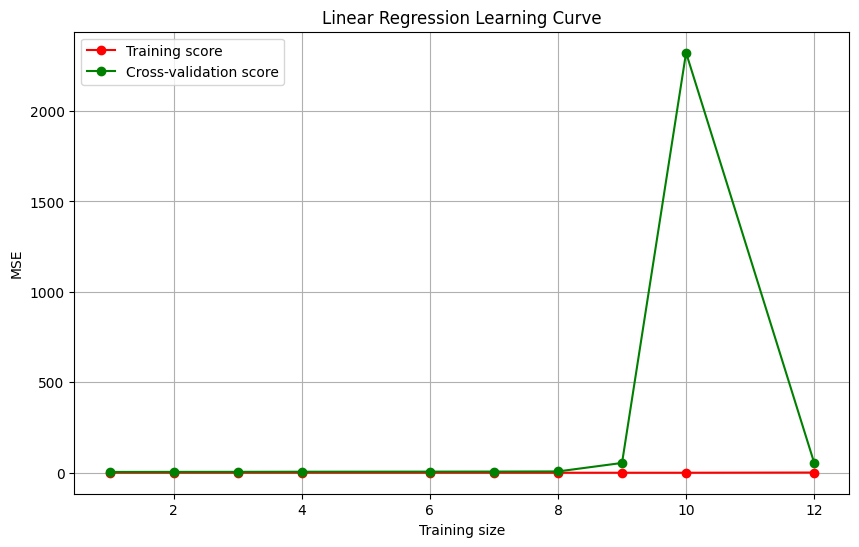

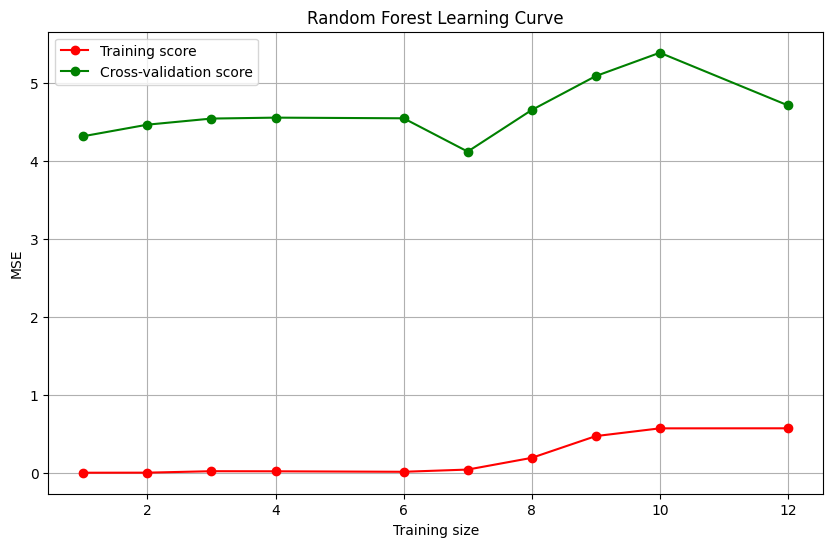

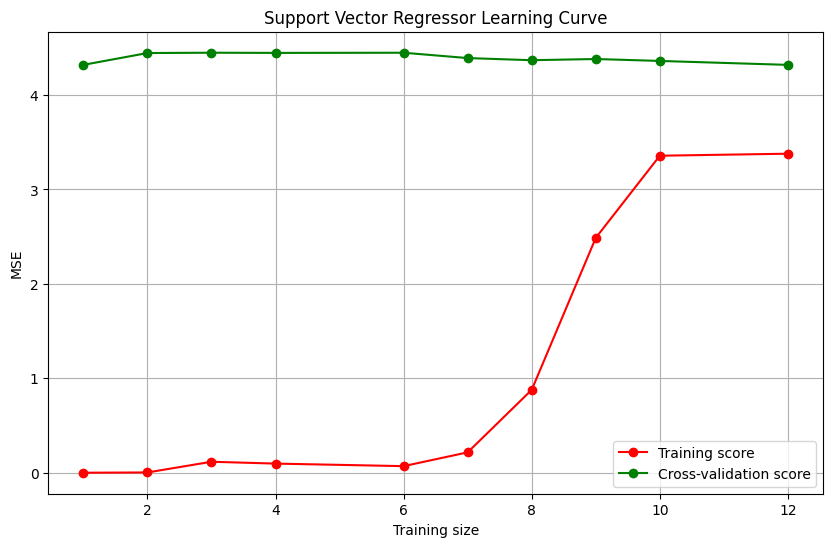

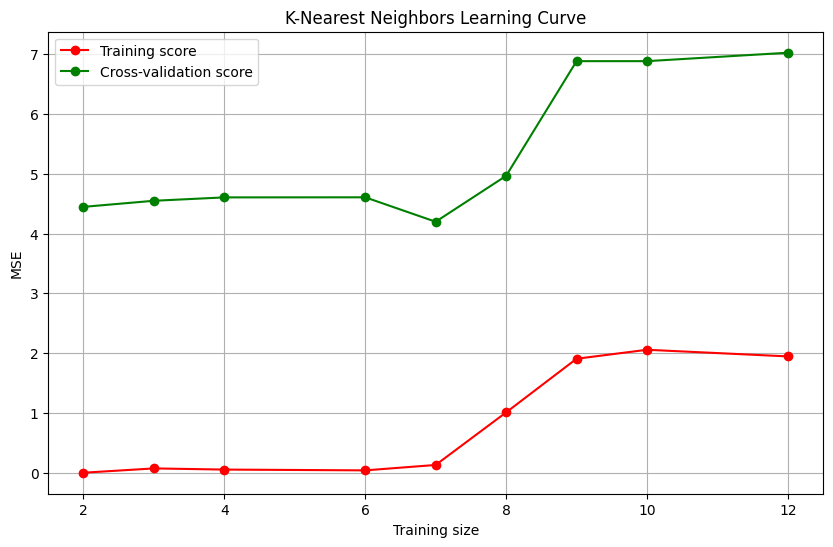

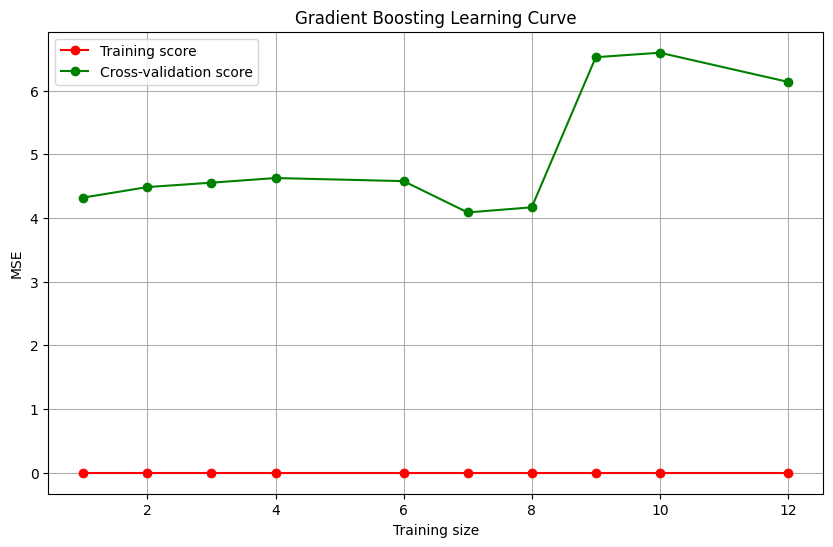

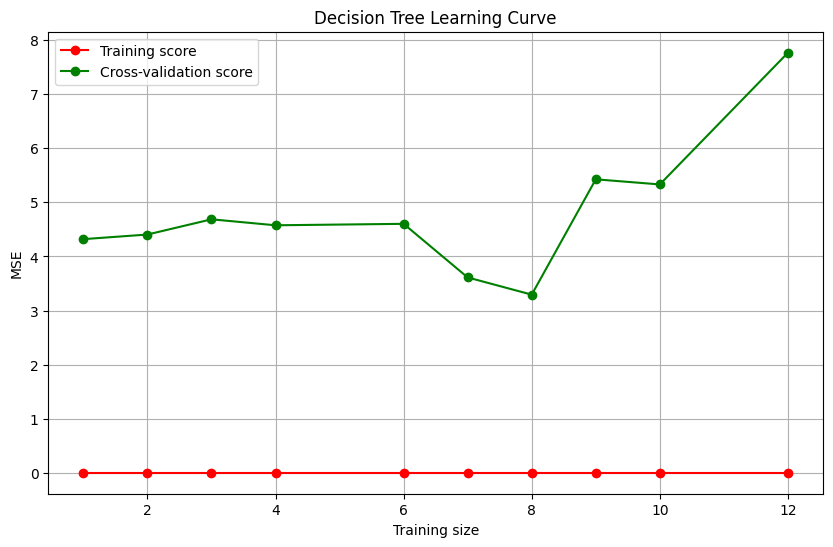

In [ ]:
from utils.plot_learning_curve import plot_learning_curve

# Plot learning curves for each model
plot_learning_curve(model_linear, X_train, y_train, title="Linear Regression Learning Curve")
plot_learning_curve(model_rf, X_train, y_train, title="Random Forest Learning Curve")
plot_learning_curve(model_svr, X_train, y_train, title="Support Vector Regressor Learning Curve")
plot_learning_curve(model_knn, X_train, y_train, title="K-Nearest Neighbors Learning Curve")
plot_learning_curve(model_gb, X_train, y_train, title="Gradient Boosting Learning Curve")
plot_learning_curve(model_dt, X_train, y_train, title="Decision Tree Learning Curve")


### Pair Plots for all Columns

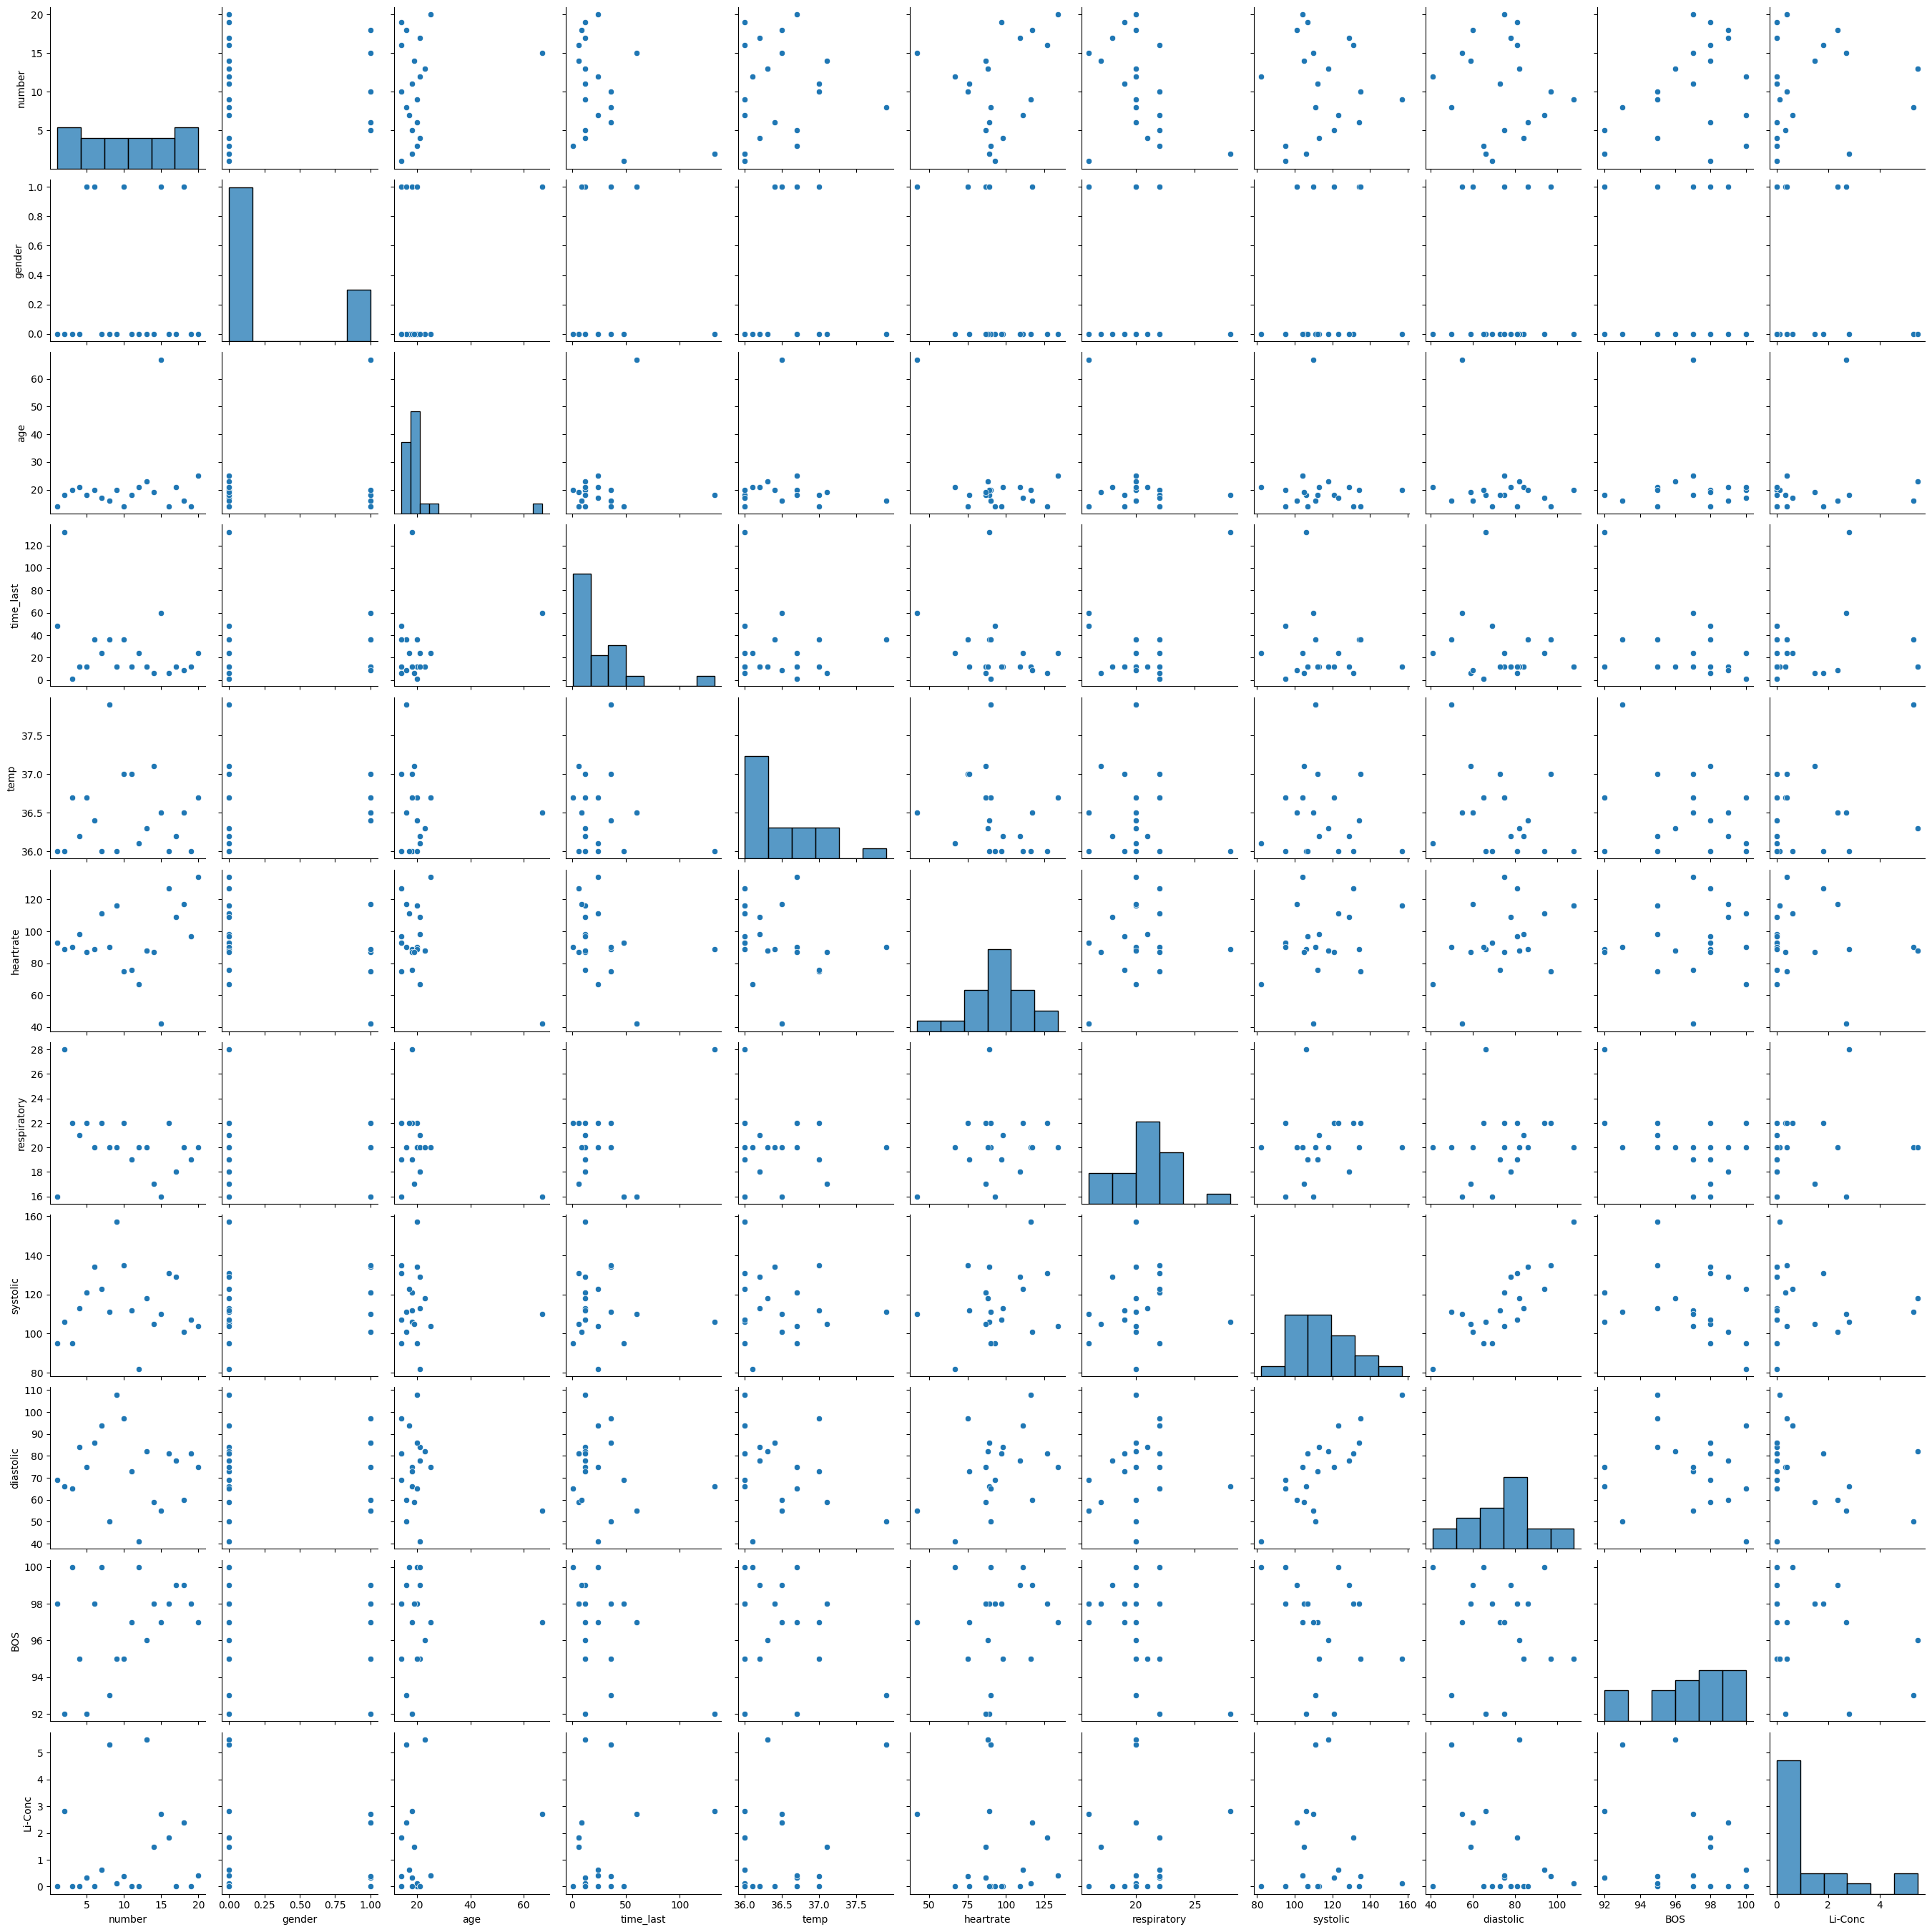

In [ ]:
# Use seaborn to show the relationhsip of every column and visulize it
sns.pairplot(df)
plt.show()

### Correlation Matrix

Helps identify **Linear relationships** between variables

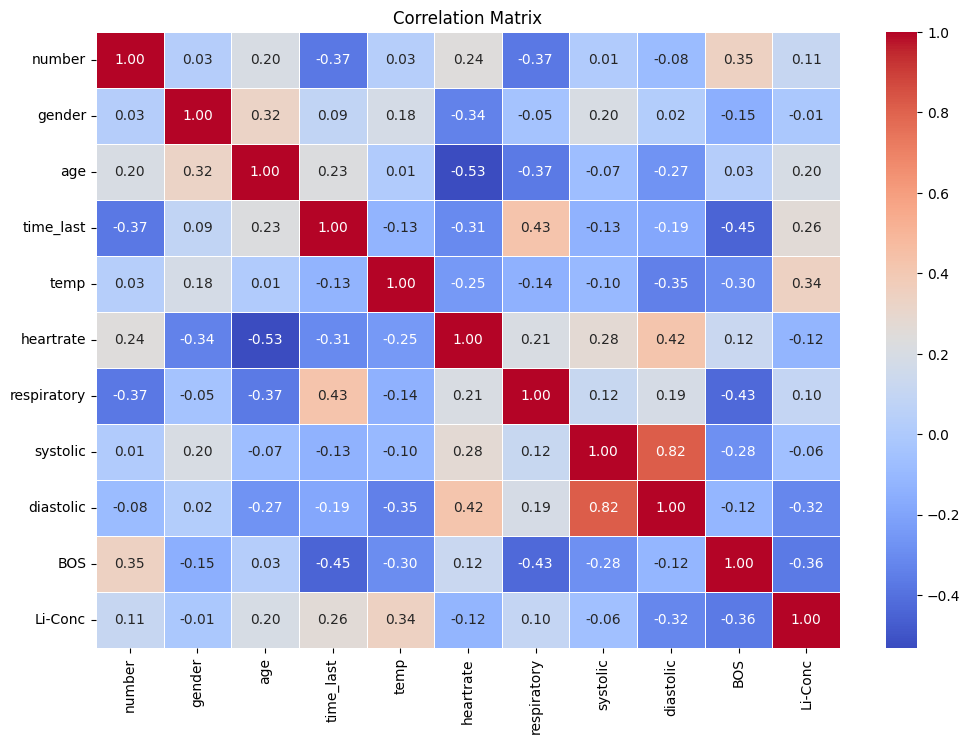

In [ ]:
# Need to first make sure that all datatypes of the dataframe are numerical
# You can do this by only chossing the numerical columns OR using a labelencoder and convert the object datatypes to numerical

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Deep Learning Model Training & Evalation

### Initialize new target and features for Deep Learning

In [ ]:
#Initialize features and targets
features = df[['gender', 'age', 'time_last', 'temp', 'heartrate', 'respiratory', 'systolic',
               'diastolic', 'BOS']]
target = df[['Li-Conc']]

# Initialize Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Standardize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize targets (important for deep learning)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

### Build the Deep Learning Model - Sequential Model

In [ ]:
# Initialize the model
model = Sequential()

# Add layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer (outputs for number of targets)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Ivan\Documents\CMA\ML Lithium Carbonate in Blood\Machine-Learning-Lithium-Carbonate-in-Blood\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the Deep Learning Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.8154 - val_loss: 3.5243
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7517 - val_loss: 3.5954
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4126 - val_loss: 3.5576
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6937 - val_loss: 3.3963
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6617 - val_loss: 3.1753
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6384 - val_loss: 2.9687
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6150 - val_loss: 2.8268
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6006 - val_loss: 2.7627
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5856 - val_loss: 2.7705
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5704 - val_loss: 2.8000
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3214 - val_loss: 2.8226
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5461 - val_l

### Evaluate the Performance of the Model

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss on test data: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Calculate metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv[:, 0], y_pred_inv[:, 0])

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.8953
Loss on test data: 8.8953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Mean Absolute Error: 4.55
Mean Squared Error: 28.30
Root Mean Squared Error: 5.32
R-squared: -23.56


### Plot How the Neural Network was Trained

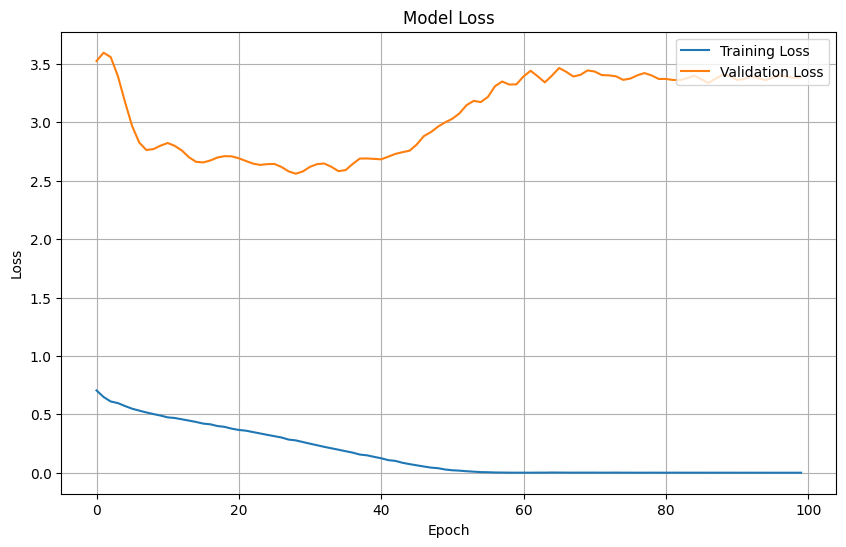

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Saving the Model

In [50]:
# Save the model
model.save('../models/NN.h5')